# WeatherPy

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pandas as pd
import os

# Input file location (CSV)
filepath = os.path.join("data/cities.csv")

### Import Data

In [2]:
# Import CSV as dataframe
city_data = pd.read_csv(filepath)

city_data.index.name = 'City_ID'
city_data = city_data.reset_index()
city_data.head(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Vardo,1.0,US,11/02/19,43.0,39.62,-77.74,54.00,4.70
1,1,Rikitea,57.0,PF,11/02/19,80.0,-23.12,-134.97,70.50,15.30
2,2,Barrow,0.0,AR,11/02/19,60.0,-38.31,-60.23,59.70,12.10
3,3,Hofn,100.0,IS,11/02/19,89.0,64.25,-15.21,40.03,32.48
4,4,Comodoro Rivadavia,3.0,AR,11/02/19,28.0,-45.87,-67.48,71.60,17.22
5,5,Bonavista,45.0,CA,11/02/19,75.0,48.65,-53.11,44.01,4.00
6,6,Flores,16.0,BR,11/02/19,37.0,-7.86,-37.97,85.14,19.30
7,7,Cape Town,40.0,ZA,11/02/19,82.0,-33.93,18.42,66.00,10.29
8,8,Sambava,100.0,MG,11/02/19,99.0,-14.27,50.17,70.20,1.25
9,9,Lebu,20.0,ET,11/02/19,48.0,8.96,38.73,60.80,6.93


### Export Data as an HTML Table

In [3]:
# Create html version of df
table_html = city_data.to_html(index=False, justify='left')
table_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: left;">\n      <th>City_ID</th>\n      <th>City</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lng</th>\n      <th>Max Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>0</td>\n      <td>Vardo</td>\n      <td>1.0</td>\n      <td>US</td>\n      <td>11/02/19</td>\n      <td>43.0</td>\n      <td>39.62</td>\n      <td>-77.74</td>\n      <td>54.00</td>\n      <td>4.70</td>\n    </tr>\n    <tr>\n      <td>1</td>\n      <td>Rikitea</td>\n      <td>57.0</td>\n      <td>PF</td>\n      <td>11/02/19</td>\n      <td>80.0</td>\n      <td>-23.12</td>\n      <td>-134.97</td>\n      <td>70.50</td>\n      <td>15.30</td>\n    </tr>\n    <tr>\n      <td>2</td>\n      <td>Barrow</td>\n      <td>0.0</td>\n      <td>AR</td>\n      <td>11/02/19</td>\n      <td>60.0</td>\n      <td>-38.31</td>\n      <td>-60

In [4]:
# Export as an html files
with open('table.html', 'w') as t:
    t.write(table_html)

### Plot Data

In [5]:
# Set plot size and color
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'dimgray'

#### Latitude vs. Temperature Plot

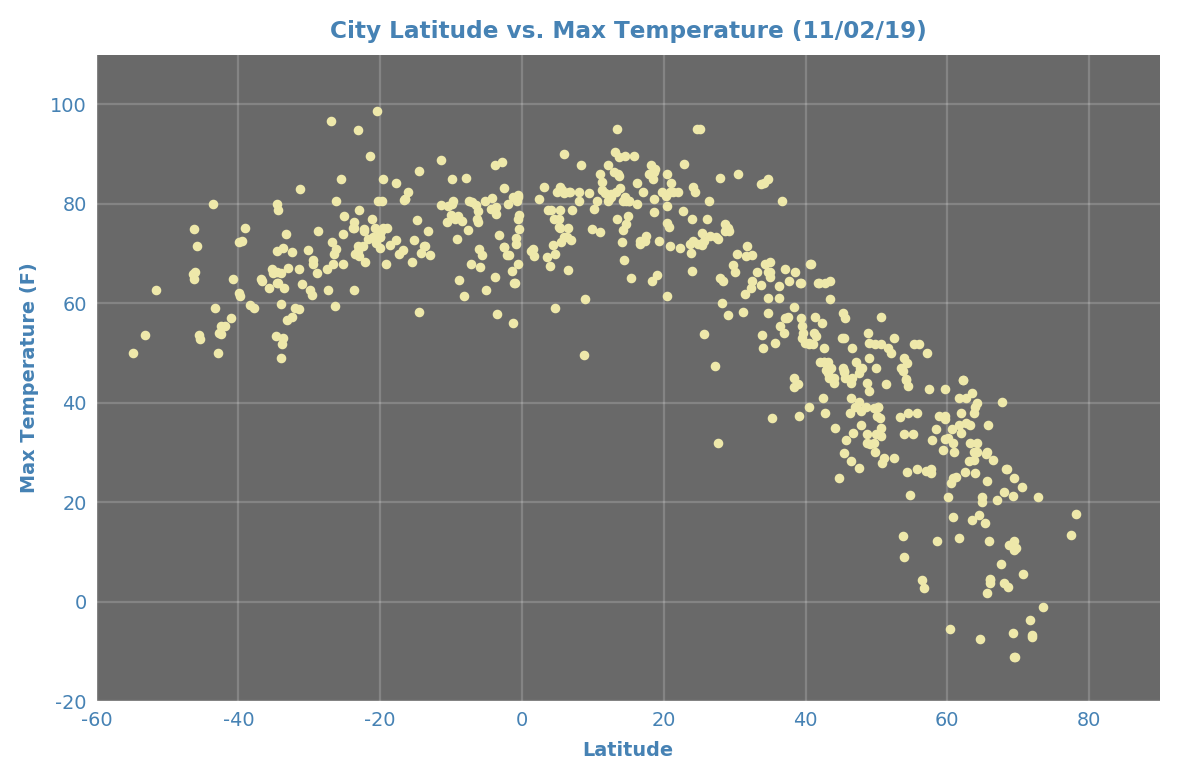

In [6]:
# Generate plot
fig, temp = plt.subplots()

# Create scatter plot of maximum temperature as a fuction of latitude
temp.scatter(city_data['Lat'], city_data['Max Temp'], s=6, c='palegoldenrod', zorder=2)

# Define title and axis labels
plt.title(f"City Latitude vs. Max Temperature ({city_data.loc[0,'Date']})", fontsize='small', weight='bold', c='steelblue')
plt.xlabel('Latitude', fontsize='x-small', weight='bold', c='steelblue')
plt.ylabel('Max Temperature (F)', fontsize='x-small', weight='bold', c='steelblue')
plt.xticks(fontsize='x-small', c='steelblue')
plt.yticks(fontsize='x-small', c='steelblue')

# Define min and max value limits for x-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

# Define min and max value limits for y-axis
ylim_min = round(city_data['Max Temp'].min(),-1) - (city_data['Max Temp'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Max Temp'].max(),-1) + (city_data['Max Temp'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Remove border around plot
temp.spines['top'].set_visible(False)
temp.spines['bottom'].set_visible(False)
temp.spines['left'].set_visible(False)
temp.spines['right'].set_visible(False)

# Format tick labels
temp.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
temp.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Remove tick marks
temp.tick_params(axis=u'both', which=u'both',length=0)

#Show grid
temp.grid(axis='both', color='whitesmoke', alpha=0.2, zorder=1)

# Save plot as a png file
plt.tight_layout()
plt.savefig('output/latitude-max_temp.png')

# Show figure
plt.show()

#### Latitude vs. Humidity Plot

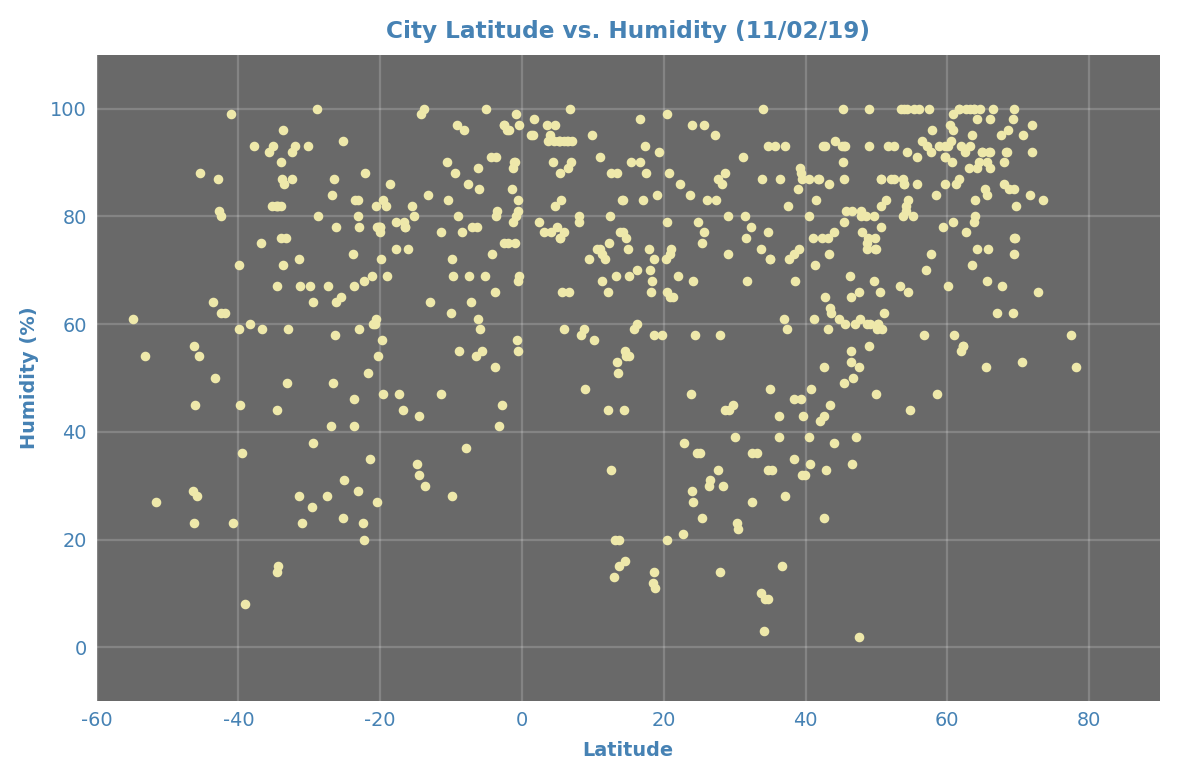

In [7]:
# Generate plot
fig, humidity = plt.subplots()

# Create scatter plot of humidity as a fuction of latitude
humidity.scatter(city_data['Lat'], city_data['Humidity'], s=6, c='palegoldenrod', zorder=2)

# Define title and axis labels
plt.title(f"City Latitude vs. Humidity ({city_data.loc[0,'Date']})", fontsize='small', weight='bold', c='steelblue')
plt.xlabel('Latitude', fontsize='x-small', weight='bold', c='steelblue')
plt.ylabel('Humidity (%)', fontsize='x-small', weight='bold', c='steelblue')
plt.xticks(fontsize='x-small', c='steelblue')
plt.yticks(fontsize='x-small', c='steelblue')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Humidity'].min(),-1) - (city_data['Humidity'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Humidity'].max(),-1) + (city_data['Humidity'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

# Remove border around plot
humidity.spines['top'].set_visible(False)
humidity.spines['bottom'].set_visible(False)
humidity.spines['left'].set_visible(False)
humidity.spines['right'].set_visible(False)

# Format tick labels
humidity.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
humidity.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Remove tick marks
humidity.tick_params(axis=u'both', which=u'both',length=0)

#Show grid
humidity.grid(axis='both', color='whitesmoke', alpha=0.2, zorder=1)
           
# Save plot as a png file
plt.tight_layout()
plt.savefig('output/latitude-humidity.png')

# Show figure
plt.show()

#### Latitude vs. Cloudiness Plot

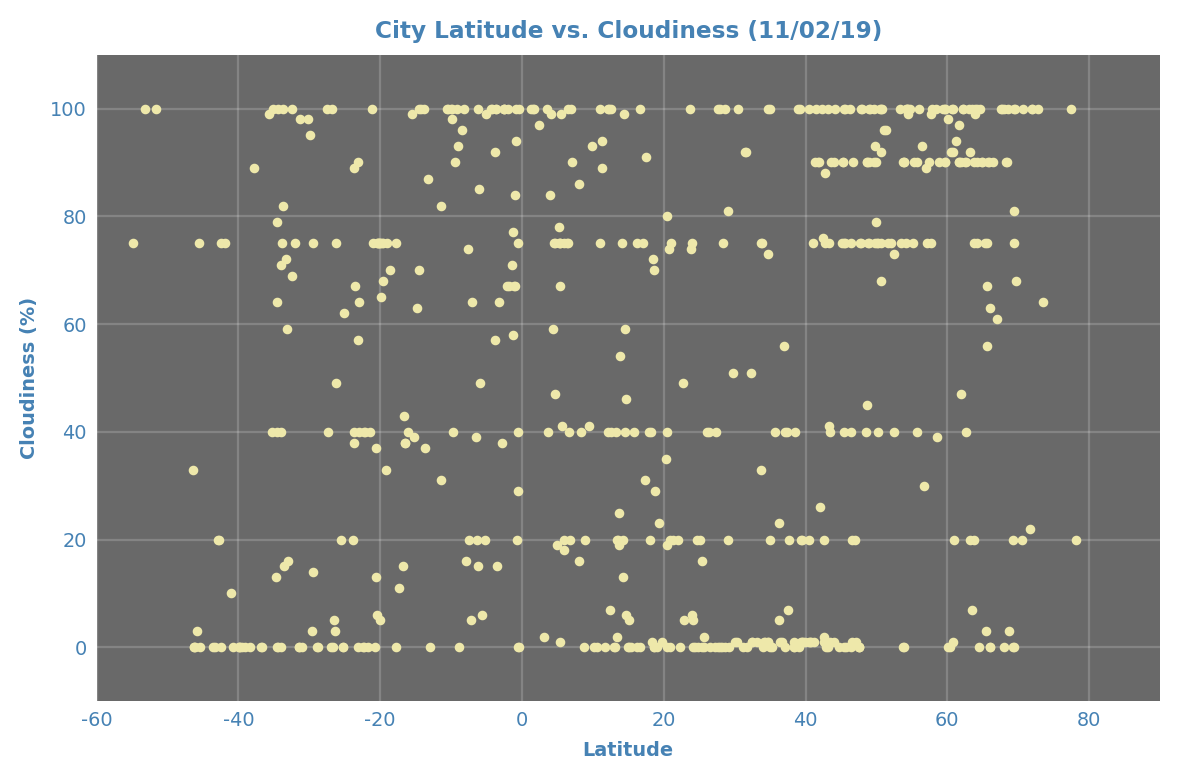

In [8]:
# Generate plot
fig, cloudiness = plt.subplots()

# Create scatter plot of cloudiness as a fuction of latitude
plt.scatter(city_data['Lat'], city_data['Cloudiness'], s=6, c='palegoldenrod', zorder=2)

# Define title and axis labels
plt.title(f"City Latitude vs. Cloudiness ({city_data.loc[0,'Date']})", fontsize='small', weight='bold', c='steelblue')
plt.xlabel('Latitude', fontsize='x-small', weight='bold', c='steelblue')
plt.ylabel('Cloudiness (%)', fontsize='x-small', weight='bold', c='steelblue')
plt.xticks(fontsize='x-small', c='steelblue')
plt.yticks(fontsize='x-small', c='steelblue')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Cloudiness'].min(),-1) - (city_data['Cloudiness'].min() % 2 >= 0) * 10
ylim_max = round(city_data['Cloudiness'].max(),-1) + (city_data['Cloudiness'].max() % 2 >= 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

# Remove border around plot
cloudiness.spines['top'].set_visible(False)
cloudiness.spines['bottom'].set_visible(False)
cloudiness.spines['left'].set_visible(False)
cloudiness.spines['right'].set_visible(False)

# Format tick labels
cloudiness.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
cloudiness.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Remove tick marks
cloudiness.tick_params(axis=u'both', which=u'both',length=0)

#Show grid
cloudiness.grid(axis='both', color='whitesmoke', alpha=0.2, zorder=1)
           
# Save plot as a png file
plt.tight_layout()
plt.savefig('output/latitude-cloudiness.png')

# Show figure
plt.show()

#### Latitude vs. Wind Speed Plot

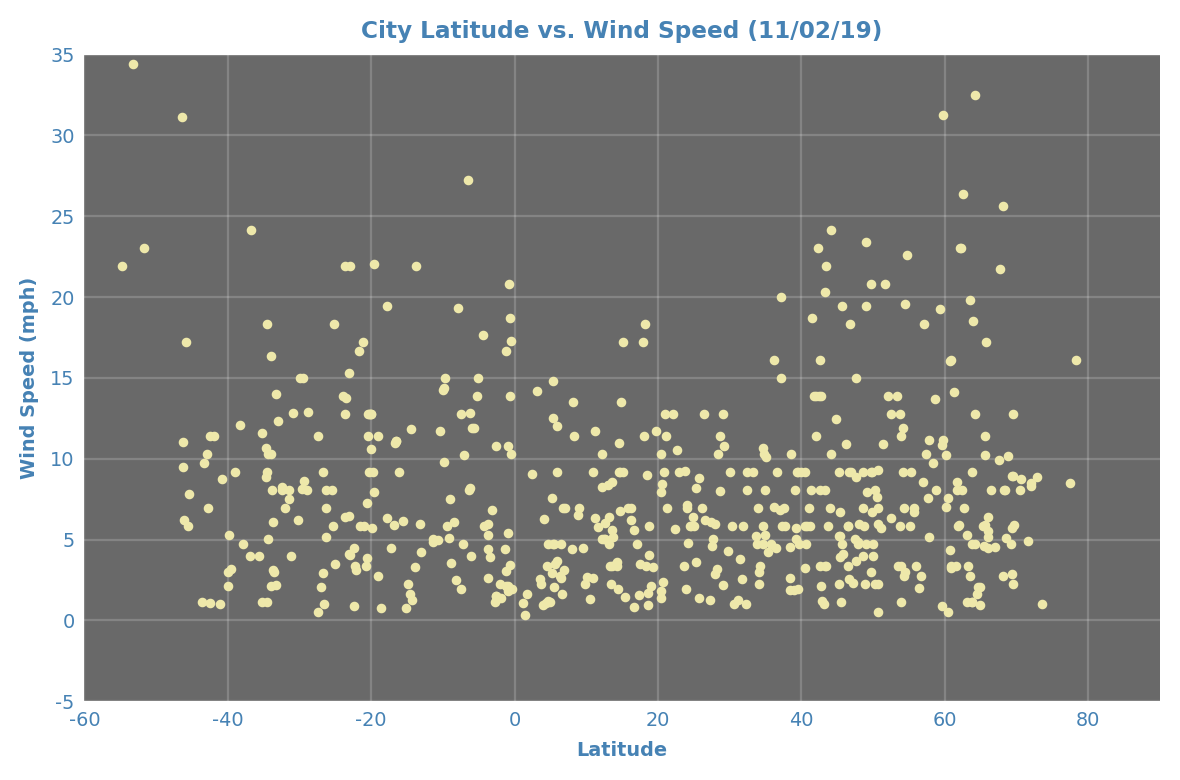

In [9]:
# Generate plot
fig, wind = plt.subplots()

# Create scatter plot of maximum temperature as a fuction of latitude
wind.scatter(city_data['Lat'], city_data['Wind Speed'], s=6, c='palegoldenrod', zorder=2)

# Define title and axis labels
plt.title(f"City Latitude vs. Wind Speed ({city_data.loc[0,'Date']})", fontsize='small', weight='bold', c='steelblue')
plt.xlabel('Latitude', fontsize='x-small', weight='bold', c='steelblue')
plt.ylabel('Wind Speed (mph)', fontsize='x-small', weight='bold', c='steelblue')
plt.xticks(fontsize='x-small', c='steelblue')
plt.yticks(fontsize='x-small', c='steelblue')

# Define min and max value limits for y-axis
ylim_min = round(city_data['Wind Speed'].min(),-1) - (city_data['Wind Speed'].min() % 2 >= 0) * 5
ylim_max = round(city_data['Wind Speed'].max(),-1) + (city_data['Wind Speed'].max() % 2 >= 0) * 5
plt.ylim(ylim_min, ylim_max, 20)

# Define min and max value limits for y-axis
xlim_min = round(city_data['Lat'].min(),-1) - (city_data['Lat'].min() % 2 >= 0) * 10
xlim_max = round(city_data['Lat'].max(),-1) + (city_data['Lat'].max() % 2 >= 0) * 10
plt.xlim(xlim_min, xlim_max, 20)

# Remove border around plot
wind.spines['top'].set_visible(False)
wind.spines['bottom'].set_visible(False)
wind.spines['left'].set_visible(False)
wind.spines['right'].set_visible(False)

# Format tick labels
wind.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
wind.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Remove tick marks
wind.tick_params(axis=u'both', which=u'both',length=0)

#Show grid
wind.grid(axis='both', color='whitesmoke', alpha=0.2, zorder=1)
           
# Save plot as a png file
plt.tight_layout()
plt.savefig('output/latitude-wind_speed.png')

# Show figure
plt.show()